In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Classifying the Celebrity Faces

In [15]:
face_cascade = cv2.CascadeClassifier('/Users/mac/Downloads/ML Project/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/mac/Downloads/ML Project/haarcascade_eye.xml')

In [16]:

#creating a function that returns a list of all of the cropped images


def single_face(d):
    
    
    images = []         #calling all the images and appending in a list
    for filename in os.listdir(d):    
        img = cv2.imread(os.path.join(d,filename))
        if img is not None:
            images.append(img)
    
    
    face_list = []      #applying the cascade filter on those images inside the list
    for i in images:
        faces = face_cascade.detectMultiScale(i)
        face_list.append(faces)
    
    
    
    
    
    
    coordinate_list = []      #list of the face coordinates
    index = []      #list of all of the indices
    for i in range(len(face_list)):
        if len(face_list[i]) == 1: #all those images in which the face has been detected
            coordinate_list.append(face_list[i])
            index.append(i)     #index of the image in which only face has been detected
        else:
            pass
        
#because there is some problem with the application of Haar cascade due to which in some images it
#detects objects other than the face thus i had to apply an if else statement
        
    img_2 = []
    for j in index:
        img_2.append(images[j])    
        
    rect = []
    for i in range(len(coordinate_list)):
        for x,y,w,h in coordinate_list[i]:
            rect.append(img_2[i][y:y+h, x:x+w])#here we are slicing the portions of the image array which covers the face
            
    return rect

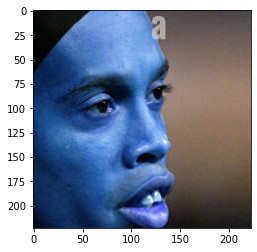

In [17]:
ronaldinho = '/Users/mac/Downloads/ML Project/ronaldinho'
ronaldinho_face = single_face(ronaldinho)


plt.imshow(ronaldinho_face[5])

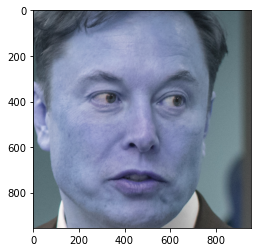

In [18]:
elon = '/Users/mac/Downloads/ML Project/elon musk'
elon_face = single_face(elon)
plt.imshow(elon_face[5])

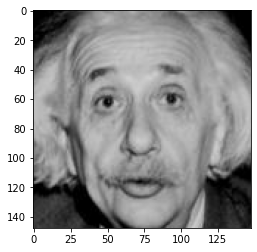

In [20]:
einstein = '/Users/mac/Downloads/ML Project/einstein'
einstein_face = single_face(einstein)
plt.imshow(einstein_face[5])

So now we have the lists which contain the images. now we will store them into some directory

In [23]:
einstein_path = os.path.join(einstein, 'croped')
elon_path = os.path.join(elon, 'croped')
ronaldinho_path = os.path.join(ronaldinho, 'croped')

In [ ]:
os.mkdir(einstein_path, exist_ok=True)
os.mkdir(elon_path, exist_ok=True)
os.mkdir(ronaldinho_path, exist_ok=True)

In [24]:
#creating path names to save the images in the cropped folder
rf_direc = []
for i in range(len(ronaldinho_face)):
    rd = ronaldinho_path + "/ronaldinho" + str(i) + ".jpg"
    rf_direc.append(rd)
    
rf_direc[:3]

['/Users/mac/Downloads/ML Project/ronaldinho/croped/ronaldinho0.jpg',
 '/Users/mac/Downloads/ML Project/ronaldinho/croped/ronaldinho1.jpg',
 '/Users/mac/Downloads/ML Project/ronaldinho/croped/ronaldinho2.jpg']

In [25]:
ef_direc = []
for i in range(len(einstein_face)):
    rd = einstein_path + "/einstein" + str(i) + ".jpg"
    ef_direc.append(rd)
    
ef_direc[:3]

['/Users/mac/Downloads/ML Project/einstein/croped/einstein0.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein1.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein2.jpg']

In [27]:
elon_direc = []
for i in range(len(elon_face)):
    rd = elon_path + "/elon" + str(i) + ".jpg"
    elon_direc.append(rd)
    
    
elon_direc[:3]

['/Users/mac/Downloads/ML Project/elon musk/croped/elon0.jpg',
 '/Users/mac/Downloads/ML Project/elon musk/croped/elon1.jpg',
 '/Users/mac/Downloads/ML Project/elon musk/croped/elon2.jpg']

##### Since we have the path names now we can save the images using open cv in these paths

In [28]:
for i in range(len(rf_direc)):
    cv2.imwrite(rf_direc[i], ronaldinho_face[i])

In [29]:
for i in range(len(ef_direc)):
    cv2.imwrite(ef_direc[i], einstein_face[i])

In [30]:
for i in range(len(elon_direc)):
    cv2.imwrite(elon_direc[i], elon_face[i])

#### Now I have the directories of the cropped faces with which i can create my labels

In [31]:
einstein_path_croped = []
for path in os.listdir(einstein_path):
    full_path = os.path.join(einstein_path, path)
    if os.path.isfile(full_path):
        einstein_path_croped.append(full_path)
            
einstein_path_croped

['/Users/mac/Downloads/ML Project/einstein/croped/einstein17.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein16.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein14.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein28.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein29.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein15.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein39.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein11.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein10.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein38.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein12.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein8.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein9.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein13.jpg',
 '/Users/mac/Downloads/ML Project/einstein/croped/einstein48.jpg

In [32]:
def croped_paths(croped_path):
    croped_list = []
    for path in os.listdir(croped_path):
        full_path = os.path.join(croped_path, path)
        if os.path.isfile(full_path):
            croped_list.append(full_path)
    return croped_list

In [33]:
#creating lists of pathnames so that we can use them in the dictionaries

einstein_croped_path = croped_paths(einstein_path)
elon_croped_path = croped_paths(elon_path)
ronaldinho_path = croped_paths(ronaldinho_path)

In [34]:
celeb = {
    'ronaldinho' : ronaldinho_path,
    'elon musk' : elon_croped_path,
    'einstein' : einstein_croped_path
    
}

In [47]:
celeb_classes = {
    'ronaldinho' : 0,
    'elon musk' : 1,
    'einstein' : 2
    
}

celeb_classes

{'ronaldinho': 0, 'elon musk': 1, 'einstein': 2}

In [77]:
X, y = [], []

for celeb_name, training_files in celeb.items():
    for training_images in training_files:
        img = cv2.imread(training_images)

            
        reshaped_image = cv2.resize(img, (32,32))
      
        X.append(reshaped_image)
        y.append(celeb_classes[celeb_name])
    
    
X = np.array(X)
y = np.array(y)
        

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
x_train.shape

(113, 32, 32, 3)

In [78]:
x_train = x_train/255
x_test = x_test/255

In [79]:
import tensorflow as tf
from tensorflow.keras import models, layers



model = models.Sequential([
    layers.Conv2D(65, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)), 
    
    
    layers.Conv2D(35, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(x_train, y_train, epochs=10)

Train on 113 samples
Epoch 1/10
113/113 [==============================] - 2s 19ms/sample - loss: 1.0800 - accuracy: 0.3274
Epoch 2/10
113/113 [==============================] - 1s 6ms/sample - loss: 1.0064 - accuracy: 0.5575
Epoch 3/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.9076 - accuracy: 0.6460
Epoch 4/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.8141 - accuracy: 0.6283
Epoch 5/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.7263 - accuracy: 0.6460
Epoch 6/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.7015 - accuracy: 0.7257
Epoch 7/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.6345 - accuracy: 0.6903
Epoch 8/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.5652 - accuracy: 0.8142
Epoch 9/10
113/113 [==============================] - 1s 6ms/sample - loss: 0.4770 - accuracy: 0.8319
Epoch 10/10
113/113 [==============================] - 1s 6m

Here we have the model with 84% accuracy ob training data

In [83]:
model.evaluate(x_test,y_test)

29/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 11ms/sample - loss: 0.4905 - accuracy: 0.8621


[0.49045413732528687, 0.86206895]

In [84]:
#we also didnt encounter any over fitting